In [38]:
import pandas as pd
import seaborn as sns
pd.options.mode.use_inf_as_na = True
df = pd.read_csv('HW1_var_20.csv',sep=';')

Взглянем на исследуемый датасет:

In [39]:
df

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,20,1000020,2НДФЛ,Ремонт,1,0.35,женский,1,0,второе высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,1000040,2НДФЛ,Ремонт,1,0.49,мужской,0,0,среднее-специальное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,1000060,2НДФЛ,Ремонт,0,0.32,мужской,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,1000080,Поступление зарплаты на счет,Ремонт,1,0.59,женский,1,0,Высшее/Второе высшее/Ученая степень,...,0.0,5.0,72.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,20,1000100,2НДФЛ,Ремонт,1,0.58,женский,0,0,высшее,...,0.0,1.0,89.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,20,1204760,Форма банка (без печати работодателя),Ремонт,1,0.58,женский,0,0,Высшее/Второе высшее/Ученая степень,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10238,20,1204780,Форма банка (без печати работодателя),Ремонт,1,0.25,мужской,1,0,Высшее/Второе высшее/Ученая степень,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10239,20,1204800,Поступление зарплаты на счет,Ремонт,0,0.54,женский,1,0,Высшее/Второе высшее/Ученая степень,...,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10240,20,1204820,2НДФЛ,Ремонт,1,0.18,женский,0,0,среднее-специальное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Переменные в таблице включают ID, различные демографические и финансовые атрибуты, такие как базовый тип дохода, цель кредита, флаг страхования, отношение долга к доходу, пол и уровень образования, а также переменные, связанные с кредитом, такие как максимальное количество просроченных платежей в разные периоды времени, количество активных и закрытых счетов, сумма платежных месяцев.

Удалим нерелевантную для самого задания переменную (номер варианта).

In [40]:
df = df.drop(['Номер варианта'],axis=1)

# Часть 1

### Исследуем распределения по данным

#### Рассчитываем кол-во уникальных значений, нулевых и пустых значений + доля в % от общего кол-ва

In [41]:
uniques = df.nunique()
zeros = (df == 0.00).astype(int).sum(axis=0)
missing = df.isnull().sum()

uniques_percent = 100 * df.nunique().sum() / len(df)
zeros_percent = 100 * (df == 0.00).astype(int).sum(axis=0).sum() / len(df)
mis_val_percent = 100 * df.isnull().sum() / len(df)

mz_table = pd.concat([uniques, zeros, missing], axis=1)
mz_table = mz_table.rename(
columns = {0 : 'Уникальных значений', 1 : 'Нулевых значений', 2 : 'Пустых значений'})

mz_table['% уникальных значений'] = 100 * mz_table['Уникальных значений'] / len(df)
mz_table['% нулевых значений'] = 100 * mz_table['Нулевых значений'] / len(df)
mz_table['% пустых значений'] = 100 * mz_table['Пустых значений'] / len(df)

mz_table

,Уникальных значений,Нулевых значений,Пустых значений,% уникальных значений,% нулевых значений,% пустых значений
ID,10242,0,0,100.000000,0.000000,0.000000
INCOME_BASE_TYPE,4,0,63,0.039055,0.000000,0.615114
CREDIT_PURPOSE,10,0,0,0.097637,0.000000,0.000000
INSURANCE_FLAG,2,3957,0,0.019527,38.635032,0.000000
DTI,59,0,109,0.576059,0.000000,1.064245
SEX,2,0,0,0.019527,0.000000,0.000000
FULL_AGE_CHILD_NUMBER,8,6001,0,0.078110,58.592072,0.000000
DEPENDANT_NUMBER,4,10195,0,0.039055,99.541105,0.000000
EDUCATION,9,0,0,0.087873,0.000000,0.000000
EMPL_TYPE,9,0,11,0.087873,0.000000,0.107401


Распределение по данным приведено в таблице. Из неё мы можем сделать следующие выводы:

*   Набор данных имеет 10 242 уникальных ID, и все они непустые и ненулевые.

*   BANKACCOUNT_FLAG имеет самый высокий процент нулевых значений — 61.33%, что указывает на то, что у этих клиентов нет банковсого счета.

*   Много переменных имеют большой процент пропусков, включая DEPENDANT_NUMBER, FULL_AGE_CHILD_NUMBER, EMPL_FORM, FAMILY_STATUS, max90days, max60days, max30days, max21days, max14days, avg_num_delay, if_zalog, num_AccountActive180, num_AccountActive90, num_AccountActive60, Active_to_All_prc, numAccountActiveAll, numAccountClosed, sum_of_paym_months , Active_not_cc, own_closed, min_MnthAfterLoan и max_MnthAfterLoan. Это означает, что нам может понадобиться тщательно обрабатывать эти пропущенные значения при построении наших моделей.

*   REDIT_PURPOSE имеет 10 уникальных значений, в то время как INCOME_BASE_TYPE, SEX, EDUCATION, EMPL_TYPE, EMPL_SIZE, EMPL_PROPERTY, Active_not_cc и own_closed имеют менее 10 уникальных значений. Это может указывать на то, что некоторые из этих признаков являются категориальными переменными.

*   avg_num_delay имеет наибольшее количество уникальных значений — 1146, что указывает на то, что в наборе данных существует много разных периодов задержки.

*   Period_at_work имеет наибольшее количество уникальных значений для непрерывной переменной, равное 366, что указывает на то, что продолжительность занятости сильно варьируется в наборе данных.



#### Среднее значение, медиана, стандартное отклонение, минимум, максимум, тип данных по каждому показателю в предоставленных данных

In [42]:
types = df.dtypes


In [43]:
numerics = ['int64', 'float64']
num_df = df.select_dtypes(include=numerics)
cat_df = df.select_dtypes(exclude=numerics)

mean = num_df.mean(axis=0).apply(lambda x: '%.3f' % x)
median = num_df.median(axis=0).apply(lambda x: '%.3f' % x)
std = num_df.std(axis=0)
minx = num_df.min(axis=0)
maxx = num_df.max(axis=0)

an_table = pd.concat([mean, median, std, minx, maxx, types], axis=1)
an_table = an_table.rename(columns = {0 : 'Среднее значение', 1 : 'Медиана', 2 : 'Стандартное отклонение', 3 : 'Минимум', 4 : 'Максимум', 5 : 'Тип'})
an_table

,Среднее значение,Медиана,Стандартное отклонение,Минимум,Максимум,Тип
ID,1102430.000,1102430.000,59135.101251,1000020.0,1.204840e+06,int64
INSURANCE_FLAG,0.614,1.000,0.486936,0.0,1.000000e+00,int64
FULL_AGE_CHILD_NUMBER,0.571,0.000,0.782160,0.0,8.000000e+00,int64
DEPENDANT_NUMBER,0.006,0.000,0.093562,0.0,3.000000e+00,int64
BANKACCOUNT_FLAG,0.375,0.000,0.853367,0.0,4.000000e+00,float64
Period_at_work,66.295,44.000,66.554710,3.0,5.180000e+02,float64
age,36.437,35.000,8.657505,23.0,6.300000e+01,float64
max90days,1.614,1.000,1.989557,0.0,2.900000e+01,float64
max60days,1.159,1.000,1.623919,0.0,2.400000e+01,float64
max30days,0.859,0.000,1.342700,0.0,1.500000e+01,float64


*   Возраст клиентов варьируется от 23 до 63 лет, в среднем 36 лет.
*   Большинство клиентов имеют страховку (61,4%) и имеют не более одного совершеннолетнего ребенка (57,1%). Однако есть клиент и с восьмью детьми.
*   Стаж работы клиентов колеблется от 3 до 518 месяцев, в среднем 66 месяцев. То есть, одни клиенты только начали работать, а другие работают уже много лет.
*   Средняя сумма платежных месяцев составляет 81,551, то есть клиенты платят в течение многих месяцев.

#### Исследуем распределение данных по полу, возрасту и другим категориальным показателям

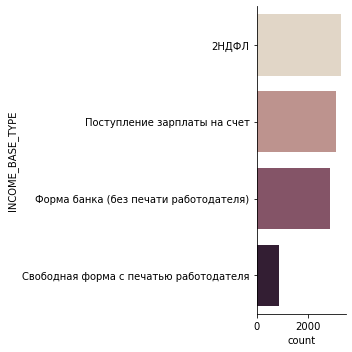

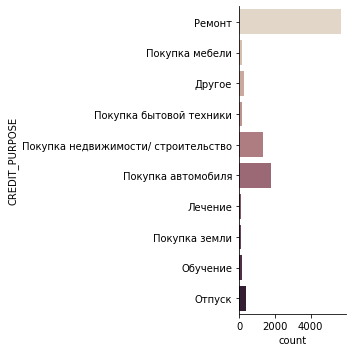

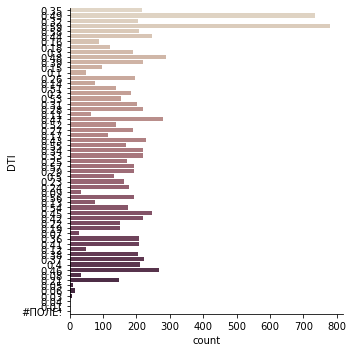

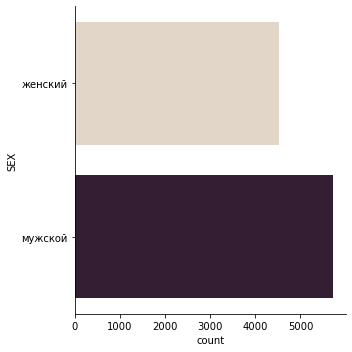

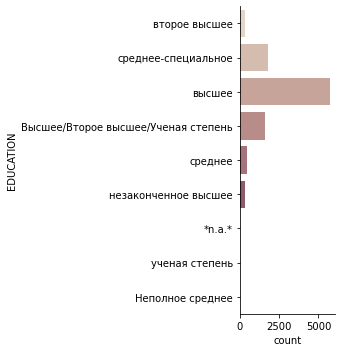

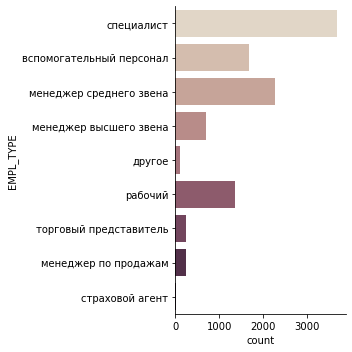

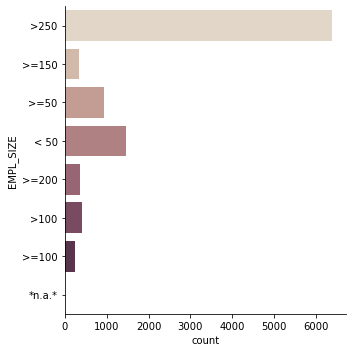

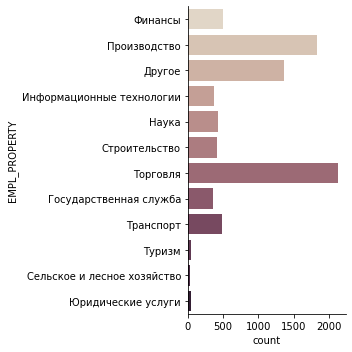

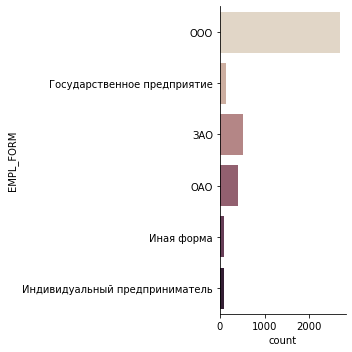

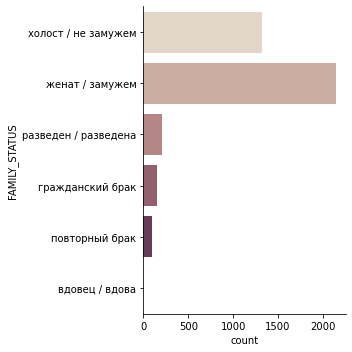

In [44]:
for x in cat_df:
    sns.catplot(y=x, kind="count", palette="ch:.25", data=df)

*   Большинство клиентов берут кредит с целью ремонта. Также в тройке популярных причин покупка недвижимости/строительство и покупка автомобиля.
*   Количество мужчин несильно преобладает.
*   Большинство клиентов имеют высшее образование и устроены специалистами или менеджерами среднего звена в крупных частных компаниях.

### Делаем проверку на:

#### Полноту данных по клиентам (пропущенные и нулевых значения в полях)

In [45]:
df_full = df.dropna()

df_full

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
3,1000080,Поступление зарплаты на счет,Ремонт,1,0.59,женский,1,0,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,...,0.0,5.0,72.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000100,2НДФЛ,Ремонт,1,0.58,женский,0,0,высшее,вспомогательный персонал,...,0.0,1.0,89.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1000180,Форма банка (без печати работодателя),Ремонт,1,0.18,женский,0,0,среднее-специальное,вспомогательный персонал,...,2.0,4.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1000280,Форма банка (без печати работодателя),Ремонт,0,0.39,женский,0,0,высшее,менеджер высшего звена,...,0.0,12.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1000420,Поступление зарплаты на счет,Покупка автомобиля,0,0.14,женский,1,0,высшее,специалист,...,0.0,1.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10226,1204540,Поступление зарплаты на счет,Ремонт,0,0.59,женский,0,0,высшее,специалист,...,1.0,5.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10233,1204680,2НДФЛ,Ремонт,1,0.32,мужской,0,0,высшее,менеджер среднего звена,...,0.0,10.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10235,1204720,2НДФЛ,Ремонт,1,0.39,женский,1,0,высшее,специалист,...,0.0,24.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10239,1204800,Поступление зарплаты на счет,Ремонт,0,0.54,женский,1,0,Высшее/Второе высшее/Ученая степень,торговый представитель,...,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Наличие некорректных знаков;

Так как предыдущие вычисления выполнялись без ошибок, некорректные знаки отсутствуют.

### Готовим итоговую витрину данных для сегментации,

#### Корректируем данные, исправляем ошибки

Все данные корректны, за исключением пропущенных значений. 

#### Исключаем клиентов с большим числом пропусков или восстанавливаем пропущенные значения

In [46]:
df_full

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
3,1000080,Поступление зарплаты на счет,Ремонт,1,0.59,женский,1,0,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,...,0.0,5.0,72.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000100,2НДФЛ,Ремонт,1,0.58,женский,0,0,высшее,вспомогательный персонал,...,0.0,1.0,89.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1000180,Форма банка (без печати работодателя),Ремонт,1,0.18,женский,0,0,среднее-специальное,вспомогательный персонал,...,2.0,4.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1000280,Форма банка (без печати работодателя),Ремонт,0,0.39,женский,0,0,высшее,менеджер высшего звена,...,0.0,12.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1000420,Поступление зарплаты на счет,Покупка автомобиля,0,0.14,женский,1,0,высшее,специалист,...,0.0,1.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10226,1204540,Поступление зарплаты на счет,Ремонт,0,0.59,женский,0,0,высшее,специалист,...,1.0,5.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10233,1204680,2НДФЛ,Ремонт,1,0.32,мужской,0,0,высшее,менеджер среднего звена,...,0.0,10.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10235,1204720,2НДФЛ,Ремонт,1,0.39,женский,1,0,высшее,специалист,...,0.0,24.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10239,1204800,Поступление зарплаты на счет,Ремонт,0,0.54,женский,1,0,Высшее/Второе высшее/Ученая степень,торговый представитель,...,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Переводим категориальные показатели в целочисленные

In [47]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

cat_df = df_full.select_dtypes(exclude=numerics)
  
label_encoder = preprocessing.LabelEncoder()
  
df_full = df_full.apply(label_encoder.fit_transform)
df_full

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
3,0,1,9,1,56,0,1,0,1,1,...,0,6,72,1,0,0,0,1,0,0
4,1,0,9,1,55,0,0,0,3,0,...,0,2,89,1,1,0,0,0,0,0
8,2,3,9,1,15,0,0,0,6,0,...,2,5,12,1,0,0,0,0,0,0
13,3,3,9,0,36,0,0,0,3,1,...,0,13,19,0,0,0,0,0,0,0
20,4,1,4,0,11,0,1,0,3,5,...,0,2,71,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10226,3588,1,9,0,56,0,0,0,3,5,...,1,6,36,1,0,0,0,0,0,0
10233,3589,0,9,1,29,1,0,0,3,3,...,0,11,23,0,0,0,0,0,0,0
10235,3590,0,9,1,36,0,1,0,3,5,...,0,25,71,0,0,0,0,0,0,0
10239,3591,1,9,0,51,0,1,0,1,6,...,0,8,7,0,0,0,0,0,0,0


Для кодирования категориальных переменных был использован Label Encoder, преобразующий категории в числовые значения в диапазоне от $0$ до $n-1$, где $n$ — количество различных категорий в данных. Например, категориальный признак INCOME_BASE_TYPE со значениями «Поступление зарплаты на счет», «2НДФЛ», «Форма банка (без печати работодателя)» и «Свободная форма с печатью работодателя». Применение Label Encoder к этой переменной преобразует эти значения в 0, 1, 2 и 3.

### Описываем все пояснения по исследованию данных и по всем преобразованиям данных.

# Часть 2

In [62]:
def info_by_cluster(df, labels, n_clusters):
    df_new = df.copy()
    df_new['cluster'] = labels
    df_new['cluster'] = df_new['cluster'].astype('category')
    df_new['cluster'] = df_new['cluster'].cat.rename_categories([f'cluster_{i}' for i in range(n_clusters)])
    df_new.drop(cat_df, axis=1, inplace=True)
    return df_new.groupby('cluster').agg(['mean']).T

### KMeans

In [49]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_full)
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [50]:
df_full['cluster'] = kmeans.labels_
df_full

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,cluster
3,0,1,9,1,56,0,1,0,1,1,...,6,72,1,0,0,0,1,0,0,1
4,1,0,9,1,55,0,0,0,3,0,...,2,89,1,1,0,0,0,0,0,1
8,2,3,9,1,15,0,0,0,6,0,...,5,12,1,0,0,0,0,0,0,1
13,3,3,9,0,36,0,0,0,3,1,...,13,19,0,0,0,0,0,0,0,1
20,4,1,4,0,11,0,1,0,3,5,...,2,71,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10226,3588,1,9,0,56,0,0,0,3,5,...,6,36,1,0,0,0,0,0,0,0
10233,3589,0,9,1,29,1,0,0,3,3,...,11,23,0,0,0,0,0,0,0,0
10235,3590,0,9,1,36,0,1,0,3,5,...,25,71,0,0,0,0,0,0,0,0
10239,3591,1,9,0,51,0,1,0,1,6,...,8,7,0,0,0,0,0,0,0,0


In [51]:
df_full['cluster'].value_counts()

0    1202
2    1199
1    1192
Name: cluster, dtype: int64

In [63]:
info_by_cluster(df_full, kmeans.labels_, 3)

,cluster,cluster_0,cluster_1,cluster_2
ID,mean,2991.497504,595.500000,1791.002502
INSURANCE_FLAG,mean,0.620632,0.609060,0.601334
FULL_AGE_CHILD_NUMBER,mean,0.500832,0.604027,0.604671
DEPENDANT_NUMBER,mean,0.002496,0.003356,0.009174
BANKACCOUNT_FLAG,mean,0.279534,0.200503,0.248540
Period_at_work,mean,49.349418,48.523490,47.860717
age,mean,12.419301,13.135067,12.973311
max90days,mean,1.792845,1.459732,1.595496
max60days,mean,1.287022,1.009228,1.090909
max30days,mean,0.942596,0.709732,0.805671


Можем выделить отличающиеся признаки:

DEPENDANT_NUMBER -- больше всего в 3 кластере

sum_of_paym_months -- больше всего у 1 кластера, а потом у 2

all_credits -- больше всего у 1 кластера, потом у 3

thirty_vintage -- 2 -> 3 -> 1 

### Кластеризация берча

In [53]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=3).fit(df_full)
birch.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
df_full['cluster'] = birch.labels_
df_full

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,cluster
3,0,1,9,1,56,0,1,0,1,1,...,6,72,1,0,0,0,1,0,0,0
4,1,0,9,1,55,0,0,0,3,0,...,2,89,1,1,0,0,0,0,0,0
8,2,3,9,1,15,0,0,0,6,0,...,5,12,1,0,0,0,0,0,0,0
13,3,3,9,0,36,0,0,0,3,1,...,13,19,0,0,0,0,0,0,0,0
20,4,1,4,0,11,0,1,0,3,5,...,2,71,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10226,3588,1,9,0,56,0,0,0,3,5,...,6,36,1,0,0,0,0,0,0,1
10233,3589,0,9,1,29,1,0,0,3,3,...,11,23,0,0,0,0,0,0,0,1
10235,3590,0,9,1,36,0,1,0,3,5,...,25,71,0,0,0,0,0,0,0,1
10239,3591,1,9,0,51,0,1,0,1,6,...,8,7,0,0,0,0,0,0,0,1


In [55]:
df_full['cluster'].value_counts()

0    1526
1    1244
2     823
Name: cluster, dtype: int64

In [57]:
info_by_cluster(df_full, birch.labels_, 3)

,cluster,cluster_0,cluster_1,cluster_2
ID,mean,765.878768,2957.568328,1950.281896
INCOME_BASE_TYPE,mean,1.454128,1.365756,1.477521
CREDIT_PURPOSE,mean,7.072739,7.295016,7.070474
INSURANCE_FLAG,mean,0.617300,0.617363,0.586877
DTI,mean,35.494102,37.549035,35.624544
SEX,mean,0.517038,0.491961,0.529769
FULL_AGE_CHILD_NUMBER,mean,0.606815,0.506431,0.596598
DEPENDANT_NUMBER,mean,0.004587,0.000000,0.013366
EDUCATION,mean,3.256225,3.075563,3.336574
EMPL_TYPE,mean,3.315858,3.083601,3.267315


### Дерево решений

In [58]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(df_full, df_full['cluster'])


DecisionTreeClassifier(random_state=0)

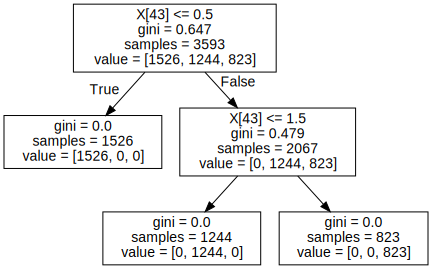

In [59]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [60]:
df_full['cluster'].value_counts()

0    1526
1    1244
2     823
Name: cluster, dtype: int64

<AxesSubplot:>

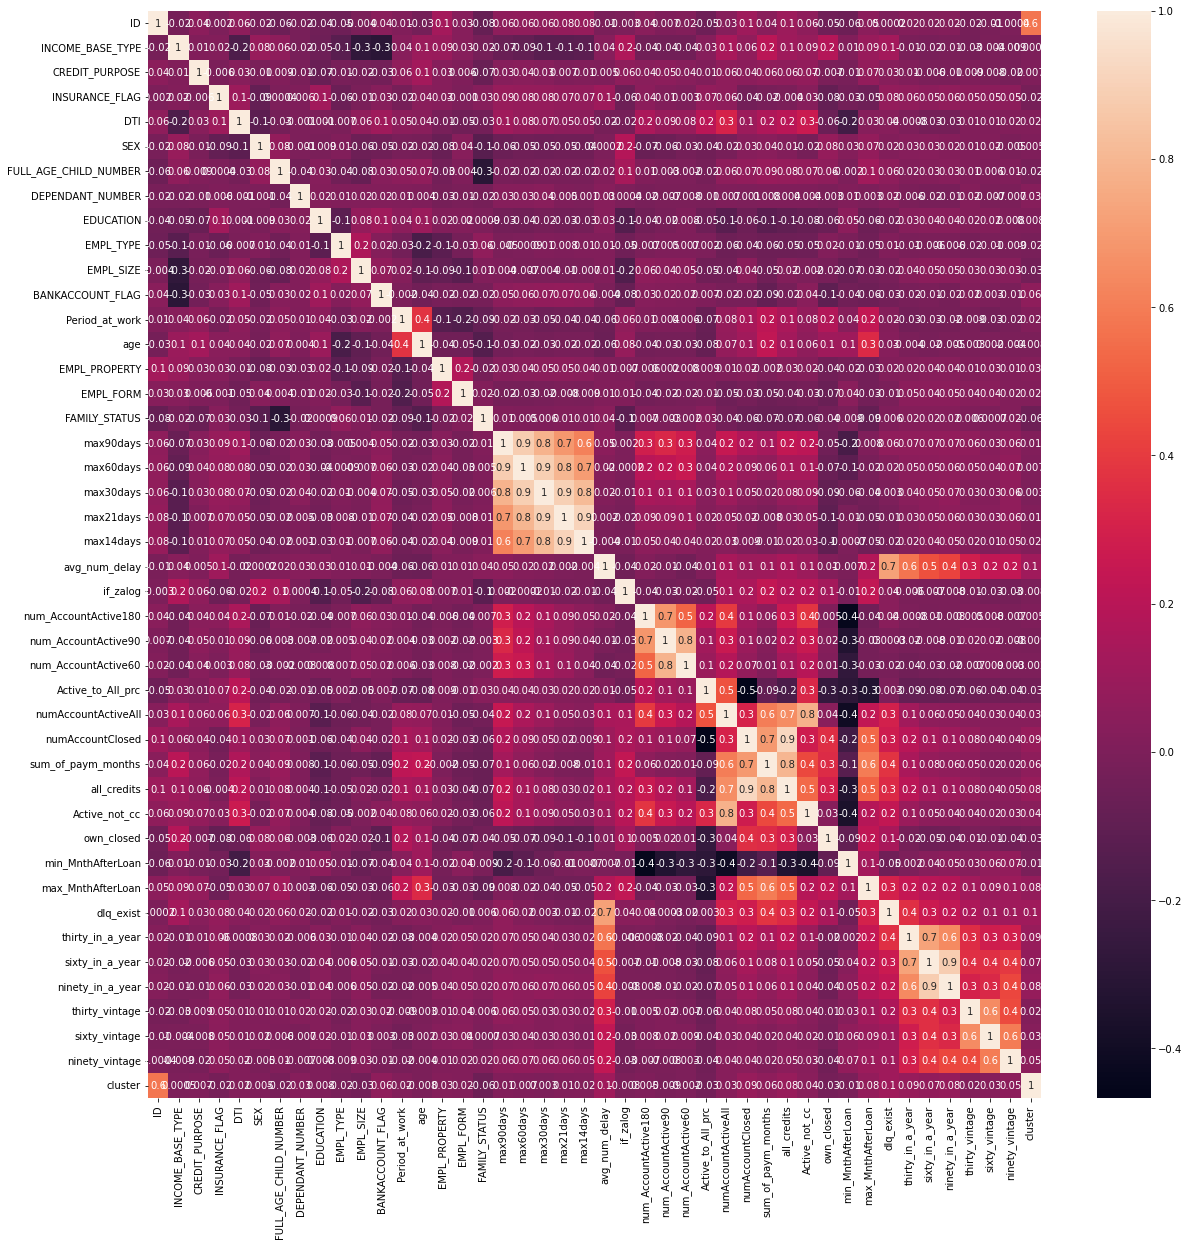

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_full.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.1g')
